In [26]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
#Load Dataset
file = "Resources/crime_data.csv"

crime_data = pd.read_csv(file)

crime_df = pd.DataFrame(crime_data)
crime_df.head(10)

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,reportMonth,reportYear
0,1,** NOT ASSIGNED **,Aggravated Assault,2.0,8,2017
1,2,** NOT ASSIGNED **,Arson,0.0,8,2017
2,3,** NOT ASSIGNED **,Auto Theft,3.0,8,2017
3,4,** NOT ASSIGNED **,Burglary,1.0,8,2017
4,5,** NOT ASSIGNED **,Homicide,0.0,8,2017
5,6,** NOT ASSIGNED **,Larceny,8.0,8,2017
6,7,** NOT ASSIGNED **,Rape,2.0,8,2017
7,8,** NOT ASSIGNED **,Robbery,1.0,8,2017
8,9,ARMATAGE,Aggravated Assault,0.0,8,2017
9,10,ARMATAGE,Arson,0.0,8,2017


In [28]:
del crime_df["neighborhoodCrimeStatisticsID"]
#crime_df

In [29]:
#Data Clean up
crime_df = crime_df.rename(columns={
    "neighborhood" : "Neighborhood",
    "ucrDescription" : "Crime",
    "number" : "Number of Cases",
    "reportMonth" : "Month",
    "reportYear" : "Year"
})
#crime_df

crime_df["Date"] = crime_df["Month"].astype(str) +"/"+ crime_df["Year"].astype(str)
#crime_df["Neighborhood"].unique()

In [30]:
#Cleaning Up Neighborhoods
crime_df["Neighborhood"] = crime_df["Neighborhood"].replace({
    '** NOT ASSIGNED **' : "Unknown",
    'Z_** NOT ASSIGNED **' : "Unknown",
    'ARMATAGE' : 'Armatage',
    'AUDUBON PARK' : 'Audubon Park',
    'BANCROFT' : 'Bancroft',
    'BELTRAMI' : 'Beltrami',
    'BOTTINEAU' : 'Bottineau',
    'BRYANT' : 'Bryant',
    'BRYN - MAWR' : 'Bryn - Mawr',
    'CAMDEN INDUSTRIAL' :'Camden Industrial',
    'CARAG' : "Carag",
    'CEDAR - ISLES - DEAN' : 'Cedar - Isles - Dean',
    'CEDAR RIVERSIDE' : 'Cedar Riverside',
    'CENTRAL' : 'Central',
    'CLEVELAND' : 'Cleveland',
    'COLUMBIA PARK' : 'Columbia Park',
    'COMO' : 'Como',
    'COOPER' : 'Cooper',
    'CORCORAN' : 'Corcoran',
    'DIAMOND LAKE' : 'Diamond Lake',
    'DOWNTOWN EAST' : 'Downtown East',
    'DOWNTOWN WEST' : 'Downtown West',
    'EAST HARRIET' : 'East Harriet',
    'EAST ISLES' : 'East Isles',
    'EAST PHILLIPS' : 'East Phillips',
    'ECCO' : "Ecco",
    'ELLIOT PARK' : 'Elliot Park',
    'ERICSSON' : 'Ericsson',
    'FIELD' : 'Field',
    'FOLWELL' : 'Folwell',
    'FULTON' : 'Fulton',
    'HALE' : 'Hale',
    'HARRISON' : 'Harrison',
    'HAWTHORNE' : 'Hawthorne',
    'HIAWATHA' : 'Hiawatha',
    'HOLLAND' : 'Holland',
    'HOWE' : 'Howe',
    'HUMBOLDT INDUSTRIAL AREA' : 'Humboldt Industrial Area',
    'JORDAN' : 'Jordan',
    'KEEWAYDIN' : 'Keewaydin',
    'KENNY' : 'Kenny', 
    'KENWOOD' : 'Kenwood', 
    'KING FIELD' : 'King Field', 
    'LIND - BOHANON' : 'Lind - Bohanon',
    'LINDEN HILLS' : 'Linden Hills', 
    'LOGAN PARK' : 'Logan Park', 
    'LONGFELLOW' : 'Longfellow', 
    'LORING PARK' : 'Loring Park',
    'LOWRY HILL' : 'Lowry Hill', 
    'LOWRY HILL EAST' : 'Lowry Hill East', 
    'LYNDALE' : 'Lyndale', 
    'LYNNHURST' : 'Lynnhurst',
    'MARCY HOLMES' : 'Marcy Holmes', 
    'MARSHALL TERRACE' : 'Marshall Terrace', 
    'MCKINLEY' : 'McKinley',
    'MID - CITY INDUSTRIAL' : 'Mid - City Industrial', 
    'MIDTOWN PHILLIPS' : 'Midtown Phillips', 
    'MINNEHAHA' : 'Minnehaha',
    'MORRIS PARK' : 'Morris Park', 
    'NEAR - NORTH' : 'Near - North', 
    'NICOLLET ISLAND - EAST BANK' : 'Nicollet Island - East Bank',
    'NORTH LOOP' : 'North Loop', 
    'NORTHEAST PARK' : 'Northeast Park', 
    'NORTHROP' : 'Northrop', 
    'PAGE' : 'Page',
    'PHILLIPS WEST' : 'Phillips West', 
    'POWDERHORN PARK' : 'Powderhorn Park',
    'PROSPECT PARK - EAST RIVER ROAD' : 'Prospect Park - East River Road', 
    'REGINA' : 'Regina', 
    'SEWARD' : 'Seward', 
    'SHERIDAN' : 'Sheridan',
    'SHINGLE CREEK' : 'Shingle Creek', 
    'ST. ANTHONY EAST' : 'St. Anthony East', 
    'ST. ANTHONY WEST' : 'St. Anthony West',
    'STANDISH' : 'Standish', 
    'STEVENS SQUARE - LORING HEIGHTS' : "Steven's Square - Loring Heights", 
    'SUMNER - GLENWOOD' : 'Sumner - Glenwood',
    'TANGLETOWN' : 'Tangletown', 
    'UNIVERSITY OF MINNESOTA' : 'University of Minnesota', 
    'VENTURA VILLAGE' : 'Ventura Village',
    'VICTORY' : 'Victory', 
    'WAITE PARK' : 'Waite Park', 
    'WEBBER - CAMDEN' : 'Webber - Camden', 
    'WENONAH' : 'Wenonah',
    'WEST CALHOUN' : 'West Calhoun', 
    'WHITTIER' : 'Whittier', 
    'WILLARD - HAY' : 'Willard - Hay', 
    'WINDOM' : 'Windom',
    'WINDOM PARK' : 'Windom Park'
})
#crime_df["Neighborhood"].unique()

In [31]:
#More Clean up
#Removing the no-named Neighborhoods
crime_df = crime_df[crime_df["Neighborhood"] != "Unknown"]
#crime_df

#Removing data outside our timeline
crime_df = crime_df[crime_df["Year"] > 2018]

#Fill NaN
crime_df["Number of Cases"] = crime_df["Number of Cases"].fillna(0)
#crime_df.head(10)

In [32]:
#Final Cleaned DataFrame
crime_df = crime_df[["Neighborhood","Crime","Number of Cases","Date"]]
crime_df

,Neighborhood,Crime,Number of Cases,Date
11968,Armatage,Aggravated Assault,0.0,1/2019
11969,Armatage,Arson,0.0,1/2019
11970,Armatage,Auto Theft,1.0,1/2019
11971,Armatage,Burglary,1.0,1/2019
11972,Armatage,Homicide,0.0,1/2019
...,...,...,...,...
41523,Windom Park,Burglary,0.0,6/2022
41524,Windom Park,Homicide,0.0,6/2022
41525,Windom Park,Larceny,11.0,6/2022
41526,Windom Park,Rape,0.0,6/2022


In [33]:
# crime_df.set_index(keys="Neighborhood",inplace=True)

In [34]:
# crime_df.head(20)
pd.options.display.max_rows = 500

In [35]:
crime_df = crime_df.set_index("Date")

In [36]:
crime_df

,Neighborhood,Crime,Number of Cases
Date,,,
1/2019,Armatage,Aggravated Assault,0.0
1/2019,Armatage,Arson,0.0
1/2019,Armatage,Auto Theft,1.0
1/2019,Armatage,Burglary,1.0
1/2019,Armatage,Homicide,0.0
...,...,...,...
6/2022,Windom Park,Burglary,0.0
6/2022,Windom Park,Homicide,0.0
6/2022,Windom Park,Larceny,11.0


In [38]:
%matplotlib notebook

<IPython.core.display.Javascript object>


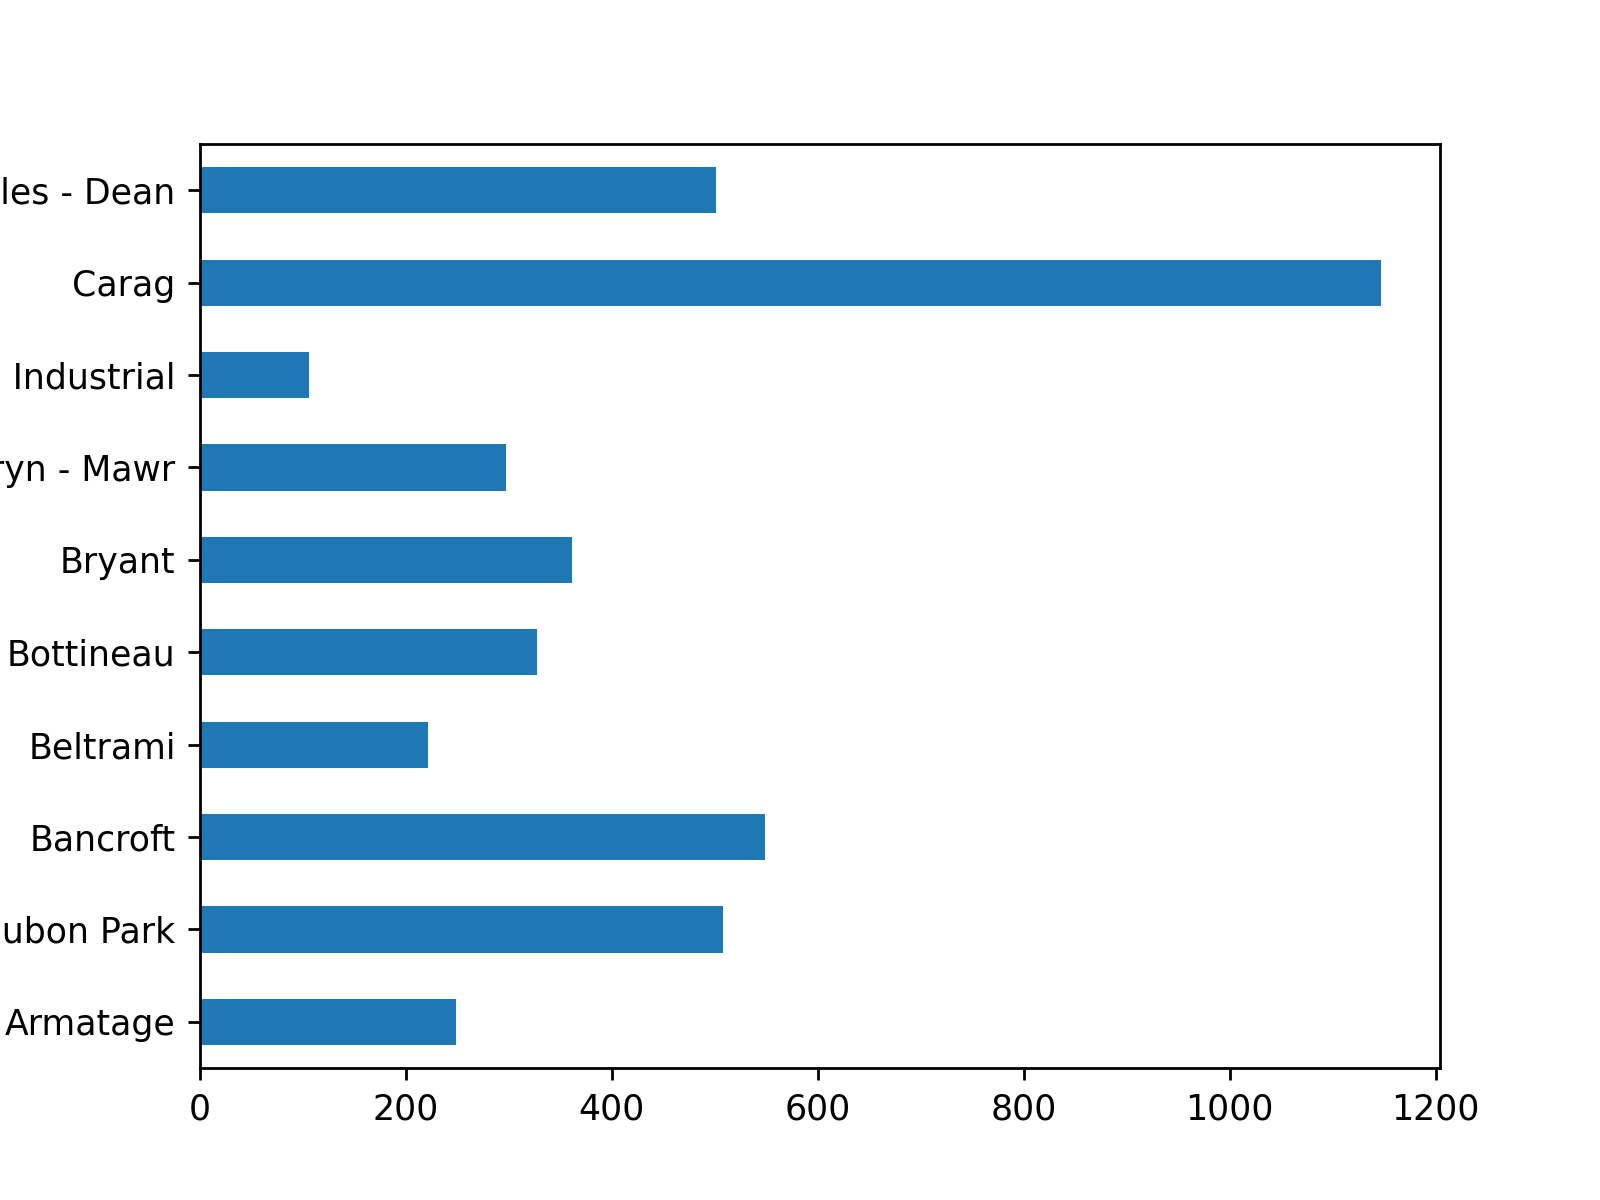

<AxesSubplot:ylabel='Neighborhood'>

In [58]:
total_cases = crime_df.groupby("Neighborhood")["Number of Cases"].sum()

total_cases[:10].plot.barh()